In [ ]:
#!pip install mne

In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime
from collections import Counter

#import DefContextTree as ct

In [ ]:
#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive/')

In [ ]:
######################################################################################
######### TO DEFINE CONTEXT TREE FUNCTIONS ###########################################
######################################################################################

import numpy as np

def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

######################################################################################

def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:    
            return key

######################################################################################

def convert_list(lista_palavras,my_dict):
    
    trad_lista_palavras = []

    for j in range(len(lista_palavras)):
        trad_palavra = ''

        for i in range(len(lista_palavras[j])):
            if i == 0:
                trad_palavra += str(get_key(my_dict,'_'))

            trad_palavra += str(get_key(my_dict,lista_palavras[j][i]))

            if i == len(lista_palavras[j])-1:
                trad_palavra += str(get_key(my_dict,'_'))

        trad_lista_palavras = np.append(trad_lista_palavras,trad_palavra)

    return(trad_lista_palavras)

###########################################################################

def get_dict(lista_letras):
    my_dict = {}
    my_dict[0] = '_'

    for i in range(len(lista_letras)):
        my_dict[i+1] = lista_letras[i]
        
    return(my_dict)

###########################################################################

def have_contexto(str_seq,contexto):
    tamanho = len(contexto)
    have = False
    
    for i in range(len(str_seq)):
        if str_seq[i:i+tamanho] == contexto:
            have = True
            
    return(have)

###########################################################################

def have_right(str_seq,contexto):
    tamanho = len(contexto)
    have = True
    
    for i in range(len(str_seq)):
        if str_seq[i:i+tamanho] == contexto:
            try:
                right = str_seq[i+tamanho]
            except:
                have = False
            
    return(have)

###########################################################################

def get_right(str_seq,contexto):
    tamanho = len(contexto)
    
    for i in range(len(str_seq)):
        if str_seq[i:i+tamanho] == contexto:
            right = str_seq[i+tamanho]

    return(right)

###########################################################################

def have_left(str_seq,contexto):
    tamanho = len(contexto)
    have = True
    
    for i in range(len(str_seq)):
        if str_seq[i:i+tamanho] == contexto:
            if i == 0:
                have = False
            
    return(have)

###########################################################################

def get_left(str_seq,contexto):
    tamanho = len(contexto)
    
    for i in range(len(str_seq)):
        if str_seq[i:i+tamanho] == contexto:
            left = str_seq[i-1]

    return(left)

###########################################################################

def expand_contexto(contexto,conv_lista):
    aux = []
    possiveis_contextos = []

    for i in range(len(conv_lista)):
        if have_contexto(conv_lista[i],contexto) == True:
            if have_right(conv_lista[i],contexto) == True:
                aux = np.append(aux,str(get_right(conv_lista[i],contexto)))

    aux = remove_repetidos(aux)

    if len(aux) == 1:
        return(contexto)
    else:
        for i in range(len(conv_lista)):
            if have_contexto(conv_lista[i],contexto) == True:
                if have_left(conv_lista[i],contexto) == True:
                    possiveis_contextos = np.append(possiveis_contextos,str(get_left(conv_lista[i],contexto)) + contexto)
                else:
                    possiveis_contextos = np.append(possiveis_contextos,contexto)

        possiveis_contextos = remove_repetidos(possiveis_contextos)

        if len(possiveis_contextos) == 1:
            return(contexto)
        else:
            return(possiveis_contextos)

############################################################

def get_contextos(lista_letras,lista_palavras,my_dict):
    
    lista_contextos = []
    todos_contextos = []

    for i in range(1,len(my_dict)):
        lista_contextos = np.append(lista_contextos,str(get_key(my_dict,my_dict[i])))

    i = 0
    while i < len(lista_contextos):
        element = lista_contextos[i]

        try:
            int(expand_contexto(element,lista_palavras)) + 1
            todos_contextos = np.append(todos_contextos,expand_contexto(element,lista_palavras))

        except:    
            lista_contextos = np.append(lista_contextos,expand_contexto(element,lista_palavras))

        i += 1
        
    return(todos_contextos)

############################################################

def define_probs(lista):
    my_dict = {}
    lista_limpa = remove_repetidos(lista)
    
    my_dict['freq'] = len(lista)
    
    for i in lista_limpa:
        my_dict[i] = round(lista.count(i)/len(lista),3)
    
    
    
    return(my_dict)

############################################################

def get_probs(contextos,lista_palavras):
    
    my_dict = {}
    
    for contexto in contextos:
        next_element = []
    
        for i in range(len(lista_palavras)):
            if have_contexto(lista_palavras[i],contexto) == True:
                next_element.append(str(get_right(lista_palavras[i],contexto)))
        
        my_dict[contexto] = define_probs(next_element)

    return(my_dict)

############################################################

def define_tree(lista_letras,lista_palavras):
    
    dictionary = get_dict(lista_letras)
    lista_palavras = convert_list(lista_palavras,dictionary)
    
    return(get_probs(get_contextos(lista_letras,lista_palavras,dictionary),lista_palavras))

############################################################

def tree_letras(arvore, letras):

    lista_contextos = list(arvore.keys())
    contextos_letras = []
    arvore_letras = {}

    for i in range(len(lista_contextos)):
        for l in range(len(lista_contextos[i])):
            if l == 0:
                contextos_letras.append(get_dict(letras)[int(lista_contextos[i][l])])
            else:
                contextos_letras[i] += get_dict(letras)[int(lista_contextos[i][l])]

        arvore_letras[contextos_letras[i]] = arvore[list(arvore.keys())[i]]


    for i in range(len(arvore_letras)):
        dict_aux = arvore_letras[list(arvore_letras.keys())[i]]
        lista_aux = list(dict_aux)

        if '0' in lista_aux:
            dict_aux['_'] = dict_aux.pop('0')

        if '1' in lista_aux:
            dict_aux[letras[0]] = dict_aux.pop('1')

        if '2' in lista_aux:
            dict_aux[letras[1]] = dict_aux.pop('2')

        if '3' in lista_aux:
            dict_aux[letras[2]] = dict_aux.pop('3')

        if '4' in lista_aux:
            dict_aux[letras[3]] = dict_aux.pop('4')
            
    return(arvore_letras)

In [ ]:
#####################################
############## FUNÇÕES ##############
#####################################

### AUXILIARES ###

def exctract_events_and_times(events):
    list_events = []
    list_time_events = []

    for i in range(len(events[0])):
        list_events.append(events[0][i][2])
        list_time_events.append(events[0][i][0])
        
    return list_events, list_time_events

###############################################################################################################

def find_lista_palavras_encontradas(list_events):

    palavra = ""
    todas_palavras = []

    for i in range(len(list_events)):
        if list_events[i] == 10001:
            if len(palavra) > 0:
                todas_palavras.append(palavra)
                palavra = ""

        elif list_events[i] == 10004:
            palavra += letras[0]

        elif list_events[i] == 10007:
            palavra += letras[1]

        elif list_events[i] == 10008:
            palavra += letras[2]

        elif list_events[i] == 10005:
            palavra += letras[3]

        else:
            palavra = ""
        
    
    return(todas_palavras)

###############################################################################################################

def contextos_relevantes(arvore_letras): #contextos não determinísticos e não determinísticos no início da palavra

    relevant_contexts = []
    relevant_contexts_inicio = []
    todos_contextos = list(arvore_letras.keys())
    
    for i in range(len(todos_contextos)):
        if len(arvore_letras[todos_contextos[i]]) > 2:
            relevant_contexts.append(todos_contextos[i])

            if todos_contextos[i][0] == '_' and len(todos_contextos[i]) >= 2:
                relevant_contexts_inicio.append(todos_contextos[i])

    return(relevant_contexts, relevant_contexts_inicio)

###############################################################################################################

def get_tempos_pre_contextos(lista_contextos, contexts_in_eeg):

    todos_tempos = []

    for i in range(len(contexts_in_eeg)):
        if contexts_in_eeg[i][1] in lista_contextos:
            todos_tempos.append(int(contexts_in_eeg[i][0]) - int(contexts_in_eeg[i-1][0]))
    
    return(todos_tempos)

###############################################################################################################

def brownianbridge(n):
    
    W = np.zeros(n)
    B = np.zeros(n)
    
    for i in range(1,n):
        W[i] = W[i-1] + (1/(n-1))**(1/2) * np.random.normal(0,1) 
        
    for i in range(1,n):
        B[i] = W[i] - (1/(n-1)) * (i-1) * W[-1]
        
    B[-1] = round(B[-1])
    
    return B

###############################################################################################################

def box_plots(df, lista_contextos):

    for context in lista_contextos:
        df[df['Context'] == context].boxplot(by ='Label', column =['Dot'])
        title_boxplot = 'Context: ' + context
        plt.title( title_boxplot )
        plt.suptitle('')
        plt.show()
    
    return()


###############################################################################################################
### ACHAR CONTEXTOS NO EEG ###
###############################################################################################################

def find_segments_in_signal(list_events):
    clust_segments = []
    segment = -1

    for i in range(len(list_events)):
        if list_events[i] == 10001 or list_events[i] == 99999:
            segment +=1
            clust_segments.append(segment)

        else:
            clust_segments.append(segment)
            
    return(clust_segments)

###############################################################################################################

def define_valid_segments(list_events,clust_segments):
    is_valid = True
    valid_segments = []

    for i in range(1,len(clust_segments)):
        if clust_segments[i] == clust_segments[i-1]:
            if list_events[i] == 10002 or list_events[i] == 10003 or list_events[i] == 10006:
                is_valid = False
        else:
            if is_valid == True:
                valid_segments.append(clust_segments[i-1])
            else:
                is_valid = True
    
    return(valid_segments)

###############################################################################################################

def translate_valid_segments(list_events,clust_segments,valid_segments):

    letras_validas = []

    for i in range(len(list_events)):
        if clust_segments[i] in valid_segments:
            letras_validas.append(dict_eeg[list_events[i]])
        else:
            letras_validas.append("")

    return(letras_validas)

###############################################################################################################

def find_define_valid_contexts(list_events,arvore_letras):
    
    clust_segments = find_segments_in_signal(list_events)
    valid_segments = define_valid_segments(list_events,clust_segments)
    letras_validas = translate_valid_segments(list_events,clust_segments,valid_segments)
    
    contextos_letras = list(arvore_letras.keys())
    is_context = []
    is_context.append('')
    proxima_letra = []
    proxima_letra.append('')

    if letras_validas[0] + letras_validas[1] in contextos_letras:
        is_context.append(letras_validas[0] + letras_validas[1])
        proxima_letra.append(letras_validas[2])
    else:
        is_context.append('')
        proxima_letra.append('')

    for i in range(2,len(letras_validas)):

        dupla = ''
        tripla = ''

        if clust_segments[i-1] == clust_segments[i]:
            dupla = letras_validas[i-1] + letras_validas[i]

            if clust_segments[i-2] == clust_segments[i-1]:
                tripla = letras_validas[i-2] + letras_validas[i-1] + letras_validas[i]


        if dupla in contextos_letras:
            is_context.append(dupla)
            
            if letras_validas[i+1] == '':
                proxima_letra.append('_')
            else:
                proxima_letra.append(letras_validas[i+1])
            
        elif tripla in contextos_letras:
            is_context.append(tripla)
            
            if letras_validas[i+1] == '':
                proxima_letra.append('_')
            else:
                proxima_letra.append(letras_validas[i+1])
            
        else:
            is_context.append('')
            proxima_letra.append('')
            
    return(is_context, proxima_letra)

###############################################################################################################

def base_line_filter(vector):
    return(vector - np.mean(vector))

###############################################################################################################
### FUNÇÕES PARA CLASSIFICAÇÃO ###
###############################################################################################################

def get_eeg_segments_by_context(contexts_in_eeg, lista_contexto, channel, window, base_line_filt = True):

    aux_contexts = []
    aux_labels = []
    aux_eeg_section = []

    for i in range(len(contexts_in_eeg)):
        if contexts_in_eeg[i][1] in lista_contexto:
            time_eeg = int(contexts_in_eeg[i][0])
            x = raw.get_data(channel, start = time_eeg-window, stop = time_eeg)

            aux_contexts.append(contexts_in_eeg[i][1])
            aux_labels.append(contexts_in_eeg[i][2])
            
            if base_line_filt == True:
                aux_eeg_section.append(base_line_filter(x[0]))
            else:
                aux_eeg_section.append(x[0])

    data_set = np.column_stack((aux_contexts, aux_labels, aux_eeg_section))
    
    return(data_set)

###############################################################################################################

def generate_dots(df, brownian):
    
    aux_eeg_context_label = []
    aux_eeg_brownian_dot = []
    
    for i in range(len(df)):
        aux_eeg_brownian_dot.append(np.dot(df[:].to_numpy()[i][2:].astype(float),brownian))
        aux_eeg_context_label.append(df[:].to_numpy()[i][:2])
        
    b_data_set = np.column_stack((aux_eeg_context_label,aux_eeg_brownian_dot))
    
    df_new = pd.DataFrame(b_data_set, columns = ['Context','Label','Dot'])
    df_new["Dot"] = pd.to_numeric(df_new["Dot"])
    df_new
    
    return(df_new)

###############################################################################################################

def find_distributions(df, context, view_histo=False, binsize=None):
    
    all_dists = []
    
    labels = df[(df['Context'] == context)].Label.drop_duplicates().to_numpy()
    
    for l in labels:
        dist = df[(df['Context'] == context) & (df['Label'] == l)].Dot.to_numpy()
        all_dists.append(dist)
        
        if view_histo == True:
            if binsize == None:
                plt.hist(dist)
            else:
                plt.hist(dist, bins=np.arange(min(dist), max(dist) + binsize, binsize))
    
    if view_histo == True:
        plt.figure()
        for i in range(len(all_dists)):
            plt.hist(all_dists[i], 50, density=True, histtype='step', cumulative=True)
            
            
    return(labels, all_dists)

###############################################################################################################

def calc_area_cumulative(x,dist):
    largura = []
    position = 0
    area = 0
    dist = np.sort(dist)

    #find total area to normalize
    for i in range(1,len(dist)):
        largura.append(dist[i]-dist[i-1])

    areas = np.multiply(largura,1/(len(dist)))
    total_area = sum(areas)

    #calculate normalized area
    while x > dist[position] and position <= len(areas)-1:
        area += areas[position]

        position +=1

    area = max(0,area - (dist[position] - x)*(1/(len(dist))))

    
    return(min(1,area/total_area))

In [ ]:
participant = 'Gui000004'
path = '/Users/pesquisador/Downloads/Dados_EEG/' + participant + '/'
#path = '/Users/guilhermesantos/Downloads/Dados_EEG/' + participant + '/'
#path = '/content/drive/MyDrive/Documentos/Mestrado_Neuro/Internship_Brasil/Dados_EEG/' + participant + '/'
file = participant + '.vhdr'

letras = ['A','I','M','R']

In [ ]:
to_print = ['A','I','M','R', '_']
to_print

In [ ]:
raw = mne.io.read_raw_brainvision(path+file)

Extracting parameters from /Users/pesquisador/Downloads/Dados_EEG/Gui000004/Gui000004.vhdr...
Setting channel info structure...


In [ ]:
raw.load_data()

Reading 0 ... 3931679  =      0.000 ...  3931.679 secs...


<RawBrainVision | Gui000004.eeg, 31 x 3931680 (3931.7 s), ~929.9 MB, data loaded>

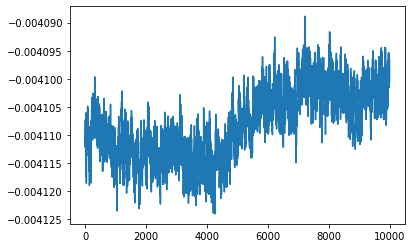

In [ ]:
eeg_signal = raw.get_data('C3', start = 60000, stop = 70000)
plt.plot(eeg_signal[0])

In [ ]:
l_freq = 1
h_freq = 30
#notch_freq = 60

raw.filter(l_freq, h_freq)
#raw.notch_filter(notch_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (3.301 sec)



<RawBrainVision | Gui000004.eeg, 31 x 3931680 (3931.7 s), ~929.9 MB, data loaded>

In [ ]:
#raw.ch_names

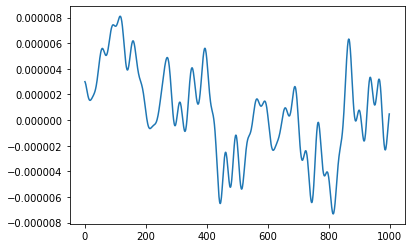

In [ ]:
start = 10000
eeg_signal = raw.get_data('C3', start = start, stop = start+1000)
plt.plot(eeg_signal[0])

In [ ]:
#%matplotlib qt
#raw.plot(duration=10.0, start=100.0, scalings='auto')

In [ ]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: ['Enter/E  1', 'Fim/F  1', 'Inexistente_palavra/I  1', 'New Segment/', 'Prime_pos_letra/P  1', 'Quarta_pos_letra/Q  1', 'Rep_palavra/R  1', 'Sec_pos_letra/S  1', 'Terc_pos_letra/T  1']


(array([[      0,       0,   99999],
        [  24422,       0,   10001],
        [  27112,       0,   10008],
        ...,
        [3914428,       0,   10001],
        [3916726,       0,   10002],
        [3917313,       0,   10001]]),
 {'Enter/E  1': 10001,
  'Fim/F  1': 10002,
  'Inexistente_palavra/I  1': 10003,
  'New Segment/': 99999,
  'Prime_pos_letra/P  1': 10004,
  'Quarta_pos_letra/Q  1': 10005,
  'Rep_palavra/R  1': 10006,
  'Sec_pos_letra/S  1': 10007,
  'Terc_pos_letra/T  1': 10008})

In [ ]:
### GERANDO NOVO DICIONÁRIO [ID EEG x LETRAS] ###

dict_eeg = {}
dict_eeg[99999] = '_'
dict_eeg[10001] = '_'
dict_eeg[10004] = letras[0]
dict_eeg[10007] = letras[1]
dict_eeg[10008] = letras[2]
dict_eeg[10005] = letras[3]

dict_eeg

{99999: '_', 10001: '_', 10004: 'A', 10007: 'I', 10008: 'M', 10005: 'R'}

In [ ]:
list_events, list_time_events = exctract_events_and_times(events)

list_events.count(10002) ### Quantas rodadas foram jogadas?

180

In [ ]:
todas_palavras = find_lista_palavras_encontradas(list_events)
len(todas_palavras)

1626

In [ ]:
Counter(todas_palavras)

Counter({'MIA': 164,
         'MIRA': 170,
         'RIA': 158,
         'MIAR': 166,
         'RIMA': 175,
         'MAR': 161,
         'IRA': 171,
         'IRMA': 162,
         'IMA': 167,
         'RIM': 132})

In [ ]:
### Extrair lista todas_palavras
#nptp = np.array(todas_palavras, dtype = '<U32')
#np.save(path+"todas_palavras", nptp)

In [ ]:
AIMR = letras
AIRM_palavras = todas_palavras

#arvore = ct.define_tree(AIMR,AIRM_palavras)
arvore = define_tree(AIMR,AIRM_palavras)


#print(ct.get_dict(letras))
#print('')
#print('#contextos: ' + str(len(arvore)))
#arvore

In [ ]:
#arvore_letras = ct.tree_letras(arvore, letras)
arvore_letras = tree_letras(arvore, letras)
arvore_letras

{'RA': {'freq': 341, '_': 1.0},
 '_I': {'freq': 500, 'M': 0.334, 'R': 0.666},
 'MI': {'freq': 500, 'A': 0.66, 'R': 0.34},
 'RI': {'freq': 465, 'A': 0.34, 'M': 0.66},
 '_M': {'freq': 661, 'A': 0.244, 'I': 0.756},
 'RM': {'freq': 162, 'A': 1.0},
 '_R': {'freq': 465, 'I': 1.0},
 'AR': {'freq': 327, '_': 1.0},
 'MIA': {'freq': 330, '_': 0.497, 'R': 0.503},
 'RIA': {'freq': 158, '_': 1.0},
 '_MA': {'freq': 161, 'R': 1.0},
 'IMA': {'freq': 342, '_': 1.0},
 'RMA': {'freq': 162, '_': 1.0},
 '_IM': {'freq': 167, 'A': 1.0},
 'RIM': {'freq': 307, '_': 0.43, 'A': 0.57},
 '_IR': {'freq': 333, 'A': 0.514, 'M': 0.486},
 'MIR': {'freq': 170, 'A': 1.0}}

In [ ]:
relevant_contexts, relevant_contexts_inicio = contextos_relevantes(arvore_letras)

print(relevant_contexts)
relevant_contexts_inicio

['_I', 'MI', 'RI', '_M', 'MIA', 'RIM', '_IR']


['_I', '_M', '_IR']

In [ ]:
is_context, label = find_define_valid_contexts(list_events,arvore_letras)
contexts_in_eeg = np.column_stack((list_time_events, is_context, label))

contexts_in_eeg

array([['0', '', ''],
       ['24422', '', ''],
       ['27112', '_M', 'I'],
       ...,
       ['3914428', '', ''],
       ['3916726', '', ''],
       ['3917313', '', '']], dtype='<U21')

In [ ]:
todos_tempos = get_tempos_pre_contextos(relevant_contexts_inicio, contexts_in_eeg)

if min(todos_tempos) > 100:
    window = min(todos_tempos)
else:
    window = np.sort(todos_tempos)[1]

window
#np.mean(np.sort(todos_tempos)[:10])

34

In [ ]:
#plt.hist(todos_tempos)
#plt.plot()

In [ ]:
channel = 'C3'

data_set = get_eeg_segments_by_context(contexts_in_eeg, relevant_contexts, channel, window)
data_set

array([['_M', 'I', '-3.819792762860984e-07', ...,
        '7.337037786956644e-07', '7.19066158115316e-07',
        '6.955000534556019e-07'],
       ['MI', 'A', '1.3590853830966819e-06', ...,
        '-3.1260974620356045e-06', '-3.0935831867970916e-06',
        '-3.009278801101168e-06'],
       ['MIA', '_', '-1.3589903761695458e-06', ...,
        '4.078363581721583e-08', '8.32811772114871e-08',
        '1.3124236630223137e-07'],
       ...,
       ['_M', 'A', '-2.798513759642841e-07', ...,
        '-2.1859538616191586e-07', '-2.370356024510932e-07',
        '-2.2316501902442196e-07'],
       ['RI', 'M', '-1.5585799399519394e-06', ...,
        '-6.034724901435495e-06', '-5.903804131047017e-06',
        '-5.652808733649525e-06'],
       ['RIM', '_', '2.3261260839359328e-06', ...,
        '3.6682396681826163e-06', '4.5566849279330584e-06',
        '5.40606110266028e-06']], dtype='<U32')

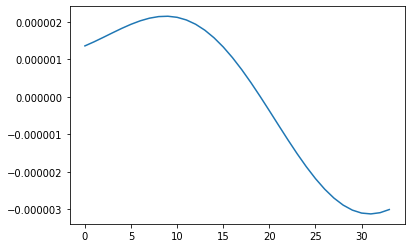

In [ ]:
plt.plot(data_set[1][2:].astype(float))

In [ ]:
df = pd.DataFrame(data_set)
training_data = df.sample(frac=0.8)
testing_data = df.drop(training_data.index)

In [ ]:
print(Counter(training_data[0]))
print(Counter(testing_data[0]))
print('')
print(Counter(df[0]))

Counter({'_M': 537, '_I': 406, 'MI': 405, 'RI': 369, '_IR': 263, 'MIA': 256, 'RIM': 241})
Counter({'_M': 124, 'RI': 96, 'MI': 95, '_I': 94, 'MIA': 74, '_IR': 70, 'RIM': 66})

Counter({'_M': 661, 'MI': 500, '_I': 500, 'RI': 465, '_IR': 333, 'MIA': 330, 'RIM': 307})


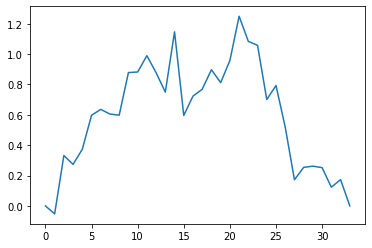

In [ ]:
b = brownianbridge(window)
plt.plot(b)

In [ ]:
training_data_dot = generate_dots(training_data, b)
testing_data_dot = generate_dots(testing_data, b)

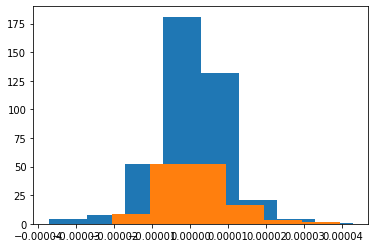

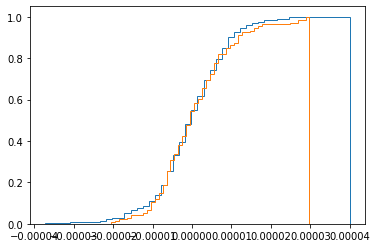

In [ ]:
labels, distributions = find_distributions(training_data_dot, '_M', view_histo = True, binsize = 0.00001)

In [ ]:
scipy.stats.kstest(distributions[0], distributions[1])

KstestResult(statistic=0.04549831487722677, pvalue=0.9777162447031557)

In [ ]:
labels

array(['I', 'A'], dtype=object)

In [ ]:
#distributions

In [ ]:
ponto = testing_data_dot[testing_data_dot['Context'] == '_M'].to_numpy()[0][2]
ponto

-6.9368024987124316e-06

In [ ]:
dist_ponto = np.repeat(ponto,len(distributions[0]))
scipy.stats.kstest(dist_ponto, distributions[0])

KstestResult(statistic=0.8312655086848635, pvalue=1.5678945640853286e-141)

In [ ]:
dist_ponto = np.repeat(ponto,len(distributions[1]))
scipy.stats.kstest(dist_ponto, distributions[1])

KstestResult(statistic=0.8134328358208955, pvalue=8.883141370084001e-45)

In [ ]:
#box_plots(training_data, relevant_contexts)

In [ ]:
context = '_M'

labels = training_data_dot[(training_data_dot['Context'] == context)].Label.drop_duplicates().to_numpy()
labels

array(['I', 'A'], dtype=object)

In [ ]:
training_data_dot[(training_data_dot['Context'] == context)]

,Context,Label,Dot
1,_M,I,9.888661e-06
4,_M,I,-6.614642e-06
6,_M,I,-1.816926e-07
9,_M,I,-1.089763e-05
10,_M,A,5.352370e-07
...,...,...,...
2457,_M,I,1.265644e-05
2464,_M,I,6.743673e-06
2465,_M,I,-4.384598e-06
2466,_M,I,-8.512779e-06


In [ ]:
def get_label_predicted(testing_data, labels, distributions, method="cac"):
    
    pred_vector = []
    
    for i in range(len(testing_data)):
        ponto = testing_data[i][2]
        
        for l in range(len(distributions)):
            dist_ponto = np.repeat(ponto,len(distributions[l]))
            
            if method == 'kst':
                if l == 0:
                    distance_min = scipy.stats.kstest(dist_ponto,distributions[l])[0]
                    pred = labels[l]
                else:
                    distance = scipy.stats.kstest(dist_ponto,distributions[l])[0]
                    if distance < distance_min:
                        distance_min = distance
                        pred = labels[l]
                
            elif method == 'wsd':
                if l == 0:
                    distance_min = scipy.stats.wasserstein_distance(dist_ponto,distributions[l])
                    pred = labels[l]
                else:
                    distance = scipy.stats.wasserstein_distance(dist_ponto,distributions[l])
                    if distance < distance_min:
                        distance_min = distance
                        pred = labels[l]
                        
            elif method == 'cac':
                if l == 0:
                    distance_min = abs(calc_area_cumulative(ponto,distributions[l])-0.5)
                    pred = labels[l]
                else:
                    distance = abs(calc_area_cumulative(ponto,distributions[l])-0.5)
                    if distance < distance_min:
                        distance_min = distance
                        pred = labels[l]
            
        pred_vector.append(pred)
        
    return(pred_vector)

In [ ]:
def get_predictions(training_data, testing_data, context, view_histo = False, binsize = None, method = "cac", labels=[], distributions=[]):
    
    testing_data = testing_data[testing_data['Context'] == context].to_numpy()
    
    if len(labels) == 0 and len(distributions) == 0:
        labels, distributions = find_distributions(training_data, context, view_histo, binsize)
    
    pred_vector = get_label_predicted(testing_data, labels, distributions, method=method)
        
    return(pred_vector)

In [ ]:
pred_vector = get_predictions(training_data_dot, testing_data_dot, context, view_histo = False, binsize = None, method = "wsd")

predicted_df = testing_data_dot.drop(['Dot'], axis=1)
predicted_df = predicted_df[predicted_df['Context'] == context]
predicted_df['Predicted'] = pred_vector

#print(predicted_df)

print(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))

print(Counter(predicted_df.Label))
print(Counter(predicted_df.Predicted))

0.5806451612903226
Counter({'I': 97, 'A': 27})
Counter({'I': 87, 'A': 37})


In [ ]:
pred_vector = get_predictions(training_data_dot, testing_data_dot, context, view_histo = False, binsize = None, method = "kst")

predicted_df = testing_data_dot.drop(['Dot'], axis=1)
predicted_df = predicted_df[predicted_df['Context'] == context]
predicted_df['Predicted'] = pred_vector

#print(predicted_df)

print(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))

print(Counter(predicted_df.Label))
print(Counter(predicted_df.Predicted))

0.5403225806451613
Counter({'I': 97, 'A': 27})
Counter({'I': 76, 'A': 48})


In [ ]:
pred_vector = get_predictions(training_data_dot, testing_data_dot, context, view_histo = False, binsize = None, method = "cac")

predicted_df = testing_data_dot.drop(['Dot'], axis=1)
predicted_df = predicted_df[predicted_df['Context'] == context]
predicted_df['Predicted'] = pred_vector

#print(predicted_df)

print(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))

print(Counter(predicted_df.Label))
print(Counter(predicted_df.Predicted))

0.6612903225806451
Counter({'I': 97, 'A': 27})
Counter({'I': 101, 'A': 23})


In [ ]:
def get_best_brownians(n, window, training_data, testing_data, context, top_melhores=0.1):
    
    kst_stat = []
    distribs = []
    all_test_data = []
    data_to_test = []
    best_distribs = []
    n_brownians_to_use = max(1,int(n*top_melhores))
    
    for i in range(n):
        b = brownianbridge(window)

        training_data_dot = generate_dots(training_data, b)
        testing_data_dot = generate_dots(testing_data, b)

        labels, distributions = find_distributions(training_data_dot, context)

        kst_stat.append(scipy.stats.kstest(distributions[0], distributions[1])[0])
        distribs.append(distributions)
        all_test_data.append(testing_data_dot)
    
    #print(kst_stat, end=' ')
    for k in range(len(distribs)):
        if len(distribs[k]) != 2:
            print(len(distribs[k]))
    #print(kst_stat[1], end=' ')
    #print(len(distribs[1]))
    kst_dists = np.column_stack((kst_stat, distribs))
    kst_cut_line = np.sort(kst_stat)[-n_brownians_to_use]

    for i in range(len(kst_dists)):
        if kst_dists[i][0] >= kst_cut_line:
            best_distribs.append(kst_dists[i][1:])
            data_to_test.append(all_test_data[i])

    return(labels, best_distribs, data_to_test)

In [ ]:
def predict_for_n_Brownian(n, window, training_data, testing_data, context, method="kst", only_best = False, top_melhores=0.1):
    pred_matrix = []
    pred_decision = []

    if only_best == False:
        for i in range(n):
            b = brownianbridge(window)

            training_data_dot = generate_dots(training_data, b)
            testing_data_dot = generate_dots(testing_data, b)

            pred_vector = get_predictions(training_data_dot, testing_data_dot, context, method = method)
            
            if i == 0:
                pred_matrix = pred_vector
            else:
                pred_matrix = np.column_stack((pred_matrix,pred_vector))
            
        for i in range(len(pred_matrix)):
            pred_decision.append(Counter(pred_matrix[i]).most_common()[0][0])

        predicted_df = testing_data_dot.drop(['Dot'], axis=1)
        #predicted_df = predicted_df[predicted_df['Context'] == context]
        #predicted_df['Predicted'] = pred_decision
        
    else:
        labels, distributions, testing_data_dot = get_best_brownians(n, window, training_data, testing_data, context, top_melhores=top_melhores)
            
        for j in range(len(distributions)):
            pred_vector = get_predictions(training_data, testing_data_dot[j], context, method = method, labels=labels, distributions=distributions[j])
    
            if j == 0:
                pred_matrix = pred_vector
            else:
                pred_matrix = np.column_stack((pred_matrix,pred_vector))
         
        for i in range(len(pred_matrix)):
            pred_decision.append(Counter(pred_matrix[i]).most_common()[0][0])
                
        predicted_df = testing_data_dot[0].drop(['Dot'], axis=1)
        
        
    predicted_df = predicted_df[predicted_df['Context'] == context]
    predicted_df['Predicted'] = pred_decision
            


    return(predicted_df)

In [ ]:
n = 20
top_melhores = 0.5
context = 'RIM'
method = "wsd"

#predicted_df = predict_for_n_Brownian(n, window, training_data, testing_data, context, method=method)
predicted_df = predict_for_n_Brownian(n, window, training_data, testing_data, context, method=method, only_best = True, top_melhores=top_melhores)

sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df)

In [ ]:
#colab

n = 200
top_melhores = 0.2
metodo = "wsd"
#window = 300

lista_channels = raw.ch_names
lista_contexto = relevant_contexts
pred_brownian = []
matrix_results = []

#lista_channels = lista_channels[21:]

print(datetime.now().strftime("%H:%M:%S"))

cont = 1
for channel in lista_channels:
    data_set = get_eeg_segments_by_context(contexts_in_eeg, lista_contexto, channel, window)
    
    df = pd.DataFrame(data_set)
    training_data = df.sample(frac=0.8)
    testing_data = df.drop(training_data.index)

    for contexto in lista_contexto:
        predicted_df = predict_for_n_Brownian(n, window, training_data, testing_data, contexto, method=metodo)
        #predicted_df = predict_for_n_Brownian(n, window, training_data, testing_data, contexto, method=metodo, only_best = True, top_melhores=top_melhores)
        pred_brownian.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
    
    matrix_results.append(pred_brownian)
    pred_brownian = []
    
    print(channel, end = ' - ')
    print(datetime.now().strftime("%H:%M:%S"))
    
    pred_results = pd.DataFrame(matrix_results, columns = lista_contexto, index = lista_channels[0:cont])#index = lista_channels)
    
    fname = participant + "_pred_results_colab_" + n + "_" + metodo.upper() + ".csv"
    pred_results.to_csv(fname, encoding = 'utf-8-sig')
    !cp pred_results_colab.csv "/content/drive/My Drive/Documentos/Mestrado_Neuro/Internship_Brasil/Pred_Results/"

    del pred_results
    #print(datetime.now().strftime("%H:%M:%S"))

    cont += 1

print(datetime.now().strftime("%H:%M:%S"))



In [ ]:
lista_channels = raw.ch_names
lista_channels[28:]

In [ ]:
#pred_results

In [ ]:
#file_name = 'pred_results_' + str(n) + '_' + datetime.now().strftime('%Y%m%d_%H%M') + '.csv'

#pred_results.to_csv("pred_results_colab.csv", encoding = 'utf-8-sig')
#!cp pred_results_colab.csv "/content/drive/My Drive/Documentos/Mestrado_Neuro/Internship_Brasil/Pred_Results/"


In [ ]:
df1 = pd.read_csv('pred_results_colab_200_KST_w300_F8.csv', index_col = 0)
df2 = pd.read_csv('pred_results_colab_200_KST_w300_resto.csv', index_col = 0)
#df3 = pd.read_csv('pred_results_colab_200_KST_20Best_TP10.csv', index_col = 0)
#df4 = pd.read_csv('pred_results_colab_200_KST_20Best_resto.csv', index_col = 0)
#df5 = pd.read_csv('pred_results_colab_200_WSD_OnlyBest_FC2.csv', index_col = 0)
#df6 = pd.read_csv('pred_results_colab_200_WSD_OnlyBest_resto.csv', index_col = 0)

frames = [df1, df2]
pred_results = pd.concat(frames)

pred_results.to_csv("pred_results_colab_200_KST_w300.csv", encoding = 'utf-8-sig')

In [ ]:
pred_results = pd.read_csv('Gui000003_pred_results_colab_200_WSD_w50.csv', index_col = 0)

In [ ]:
pred_results

,_I,MI,RI,_M,MIA,RIM,_IR
Fp1,0.329545,0.540000,0.587500,0.604839,0.500000,0.507937,0.521739
Fz,0.470588,0.560976,0.569767,0.496124,0.531250,0.500000,0.408163
F3,0.614583,0.524272,0.666667,0.401460,0.434783,0.422222,0.447761
F7,0.359551,0.536082,0.494118,0.569343,0.578125,0.387755,0.461538
FT9,0.623377,0.651786,0.628205,0.720000,0.485714,0.406780,0.569231
FC5,0.530612,0.545455,0.641026,0.508065,0.666667,0.507692,0.508475
FC1,0.339806,0.530612,0.494253,0.504274,0.450000,0.543478,0.480000
C3,0.611765,0.650602,0.712644,0.428571,0.546667,0.301887,0.442857
T7,0.522222,0.500000,0.481013,0.336000,0.605634,0.491803,0.500000
TP9,0.553191,0.656566,0.560440,0.408000,0.561644,0.551020,0.436364


In [ ]:
for context in relevant_contexts:
    print(str(context) + ': ' + pred_results.idxmax(axis = 0)[context] + ' ' + str(round(pred_results[context].max(),2)))

_I: P8 0.7
MI: FT10 0.74
RI: FT10 0.72
_M: FT9 0.72
MIA: FC5 0.67
RIM: Pz 0.63
_IR: P3 0.59


In [ ]:
round(pred_results.mean(),2)

_I     0.50
MI     0.59
RI     0.57
_M     0.41
MIA    0.51
RIM    0.47
_IR    0.50
dtype: float64

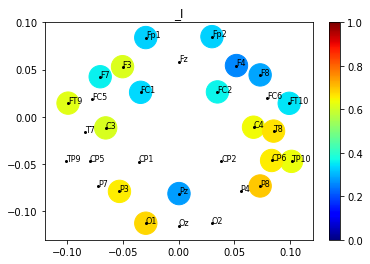

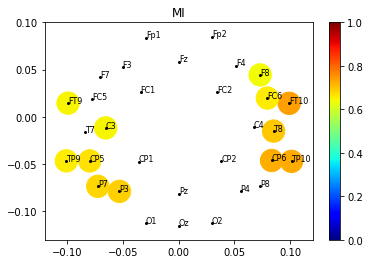

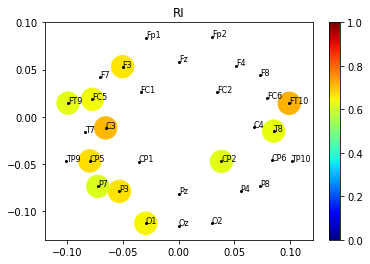

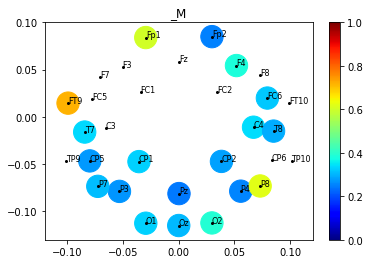

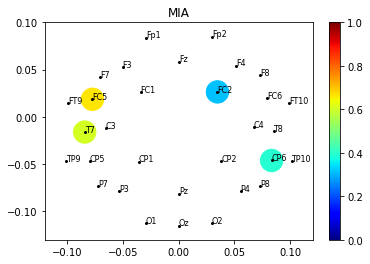

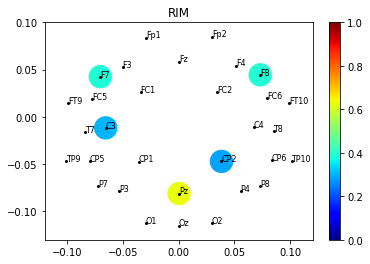

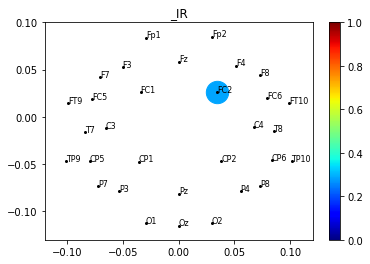

In [ ]:
lista_channels = raw.ch_names

#montages: 'standard_1020', 'biosemi64'
montage = mne.channels.make_standard_montage('standard_1020')
channel_pos = montage.get_positions()['ch_pos']

cm = plt.cm.get_cmap('jet')

x_pos = []
y_pos = []

for ch in lista_channels:
    if ch == 'FT9' or ch == 'TP9':
        x_pos.append(channel_pos[ch][0] - 0.015)
    elif ch == 'FT10' or ch == 'TP10':
        x_pos.append(channel_pos[ch][0] + 0.015)
    else:
        x_pos.append(channel_pos[ch][0])
        
    y_pos.append(channel_pos[ch][1])

###############################################################################################################


for context in relevant_contexts:
    x = []
    y = []
    color = []
    plt.xlim(-0.12, 0.12)
    plt.ylim(-0.13, 0.10)
    #plt.grid()
    
    for i in range(len(x_pos)):
        if pred_results[context][i] <= 0.4 or pred_results[context][i] >= 0.6:
            x.append(x_pos[i])
            y.append(y_pos[i])
            color.append(pred_results[context][i])
            
    sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=500, cmap=cm)
    
    #for i in range(len(x)):
        #area = pred_results[context][i] - pred_results.mean()[context]
        #area = (pred_results[context][i] - 0.55)
        #plt.scatter(x[i], y[i], s=max(area,0)*10000, alpha=0.5)
        
        
    for i, txt in enumerate(lista_channels):
        plt.plot(x_pos[i],y_pos[i],marker = 'o', c='black', markersize=2)
        plt.annotate(txt, (x_pos[i], y_pos[i]), size=8)
    
    plt.colorbar(sc)
    plt.title(context)
    plt.show()

In [ ]:
legenda = ['.I', 'MI', 'RI', '.M', 'MIA', 'RIM', '.IR']
metodo = "wsd"

_I
1 - 14:01:34
11 - 14:01:36
21 - 14:01:41
31 - 14:01:49
41 - 14:01:59
51 - 14:02:12
61 - 14:02:26
71 - 14:02:43
81 - 14:03:03
91 - 14:03:24
101 - 14:03:48
MI
1 - 14:03:48
11 - 14:03:50
21 - 14:03:55
31 - 14:04:03
41 - 14:04:12
51 - 14:04:24
61 - 14:04:38
71 - 14:04:55
81 - 14:05:14
91 - 14:05:35
101 - 14:05:58
RI
1 - 14:05:58
11 - 14:06:01
21 - 14:06:06
31 - 14:06:13
41 - 14:06:22
51 - 14:06:34
61 - 14:06:48
71 - 14:07:05
81 - 14:07:23
91 - 14:07:44
101 - 14:08:07
_M
1 - 14:08:08
11 - 14:08:10
21 - 14:08:15
31 - 14:08:23
41 - 14:08:33
51 - 14:08:45
61 - 14:08:59
71 - 14:09:16
81 - 14:09:36
91 - 14:09:57
101 - 14:10:21
MIA
1 - 14:10:21
11 - 14:10:24
21 - 14:10:29
31 - 14:10:35
41 - 14:10:45
51 - 14:10:56
61 - 14:11:09
71 - 14:11:25
81 - 14:11:43
91 - 14:12:03
101 - 14:12:26
RIM
1 - 14:12:26
11 - 14:12:29
21 - 14:12:33
31 - 14:12:40
41 - 14:12:49
51 - 14:13:01
61 - 14:13:14
71 - 14:13:30
81 - 14:13:48
91 - 14:14:08
101 - 14:14:30
_IR
1 - 14:14:30
11 - 14:14:33
21 - 14:14:38
31 - 14:14:

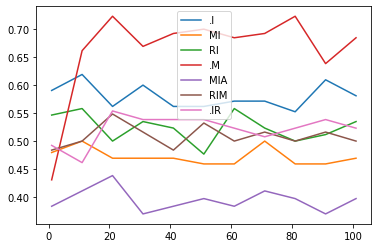

In [ ]:
fname = participant + "_graf_100_10_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,102,10))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()


_I
1 - 14:16:36
11 - 14:16:38
21 - 14:16:43
31 - 14:16:50
41 - 14:17:00
51 - 14:17:12
61 - 14:17:26
71 - 14:17:42
81 - 14:18:01
91 - 14:18:22
101 - 14:18:45
111 - 14:19:11
121 - 14:19:38
131 - 14:20:08
141 - 14:20:43
151 - 14:21:17
161 - 14:21:54
171 - 14:22:33
181 - 14:23:15
191 - 14:23:58
201 - 14:24:44
MI
1 - 14:24:45
11 - 14:24:47
21 - 14:24:52
31 - 14:24:59
41 - 14:25:08
51 - 14:25:20
61 - 14:25:34
71 - 14:25:50
81 - 14:26:09
91 - 14:26:29
101 - 14:26:52
111 - 14:27:18
121 - 14:27:45
131 - 14:28:15
141 - 14:28:47
151 - 14:29:22
161 - 14:30:07
171 - 14:30:46
181 - 14:31:27
191 - 14:32:10
201 - 14:32:56
RI
1 - 14:32:56
11 - 14:32:59
21 - 14:33:03
31 - 14:33:10
41 - 14:33:20
51 - 14:33:31
61 - 14:33:45
71 - 14:34:01
81 - 14:34:19
91 - 14:34:40
101 - 14:35:03
111 - 14:35:28
121 - 14:35:55
131 - 14:36:24
141 - 14:36:56
151 - 14:37:30
161 - 14:38:06
171 - 14:38:45
181 - 14:39:26
191 - 14:40:09
201 - 14:40:54
_M
1 - 14:40:54
11 - 14:40:57
21 - 14:41:02
31 - 14:41:09
41 - 14:41:19
51 - 14

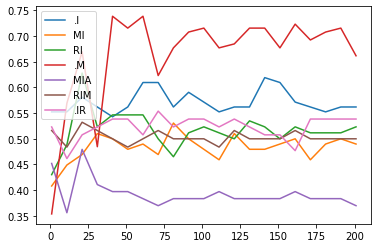

In [ ]:
fname = participant + "_graf_200_10_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,202,10))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()

_I
1 - 15:12:42
51 - 15:12:53
101 - 15:13:16
151 - 15:13:51
201 - 15:14:37
251 - 15:15:34
301 - 15:16:43
351 - 15:18:03
401 - 15:19:35
451 - 15:21:18
501 - 15:23:12
551 - 15:25:18
601 - 15:27:35
651 - 15:30:03
701 - 15:32:44
751 - 15:35:35
801 - 15:38:38
851 - 15:41:53
901 - 15:45:19
951 - 15:48:56
1001 - 15:52:44
MI
1 - 15:52:44
51 - 15:52:56
101 - 15:53:19
151 - 15:53:53
201 - 15:54:38
251 - 15:55:35
301 - 15:56:43
351 - 15:58:03
401 - 15:59:33
451 - 16:01:15
501 - 16:03:08
551 - 16:05:13
601 - 16:07:29
651 - 16:09:56
701 - 16:12:35
751 - 16:15:25
801 - 16:18:27
851 - 16:21:39
901 - 16:25:03
951 - 16:28:38
1001 - 16:32:25
RI
1 - 16:32:25
51 - 16:32:37
101 - 16:32:59
151 - 16:33:33
201 - 16:34:19
251 - 16:35:15
301 - 16:36:22
351 - 16:37:41
401 - 16:39:11
451 - 16:40:52
501 - 16:42:44
551 - 16:44:48
601 - 16:47:03
651 - 16:49:29
701 - 16:52:06
751 - 16:54:54
801 - 16:57:54
851 - 17:01:05
901 - 17:04:27
951 - 17:08:00
1001 - 17:11:44
_M
1 - 17:11:45
51 - 17:11:57
101 - 17:12:20
151 - 1

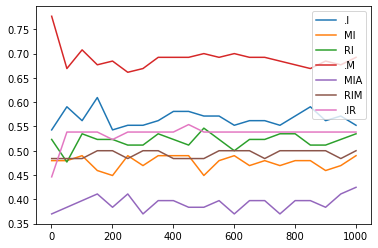

In [ ]:
fname = participant + "_graf_1000_50_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,1002,50))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()

In [ ]:
legenda = ['.I', 'MI', 'RI', '.M', 'MIA', 'RIM', '.IR']
metodo = "kst"

In [ ]:
fname = participant + "_graf_100_10_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,102,10))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()



In [ ]:
fname = participant + "_graf_200_10_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,202,10))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()

In [ ]:
fname = participant + "_graf_1000_50_" + metodo + "_" + channel + ".png"

for context in relevant_contexts:
    accuracy = []
    steps = np.array(range(1,1002,50))
    print(context)
    
    for i in steps:
        predicted_df = predict_for_n_Brownian(i, window, training_data, testing_data, context, method = metodo)
        accuracy.append(sum(predicted_df['Label'] == predicted_df['Predicted'])/len(predicted_df))
        print(i, end = ' - ')
        print(datetime.now().strftime("%H:%M:%S"))

    plt.plot(steps, accuracy)

plt.legend(legenda)
plt.savefig(fname)
plt.show()